In [201]:
import pandas as pd
from datetime import datetime
import os

# Viz libs
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition


In [202]:
# local filename we're reading in
folder = 'Race Dashboard data'
filename = 'df_weekly_with_calcs.xlsx'

path = os.path.join(folder, filename)

In [203]:
df = pd.read_excel(path)
df['OEE %'] = df['OEE %'].mul(100)

In [204]:
# local filename we're reading in
folder = 'Race Dashboard data'
filename = 'QSDashboard_McL.xlsx'

path = os.path.join(folder, filename)

In [205]:
df_dash = pd.read_excel(path)

In [206]:
df = df.merge(df_dash[['Line','Process']], on='Line')

In [207]:
df

,Unnamed: 0,Week,Line,OEE %,WeekOfYear,Year,Date,Plant,OEE Start point,OEE% Target (2022),...,sector_8,sector_9,sector_10,sector_11,sector_12,sector_13,lap_time,Plant Line,Process_x,Process_y
0,0,W13-2021,FRA - M18 Filling,4.612360,13,2021,2021-04-04,Frankfurt,0.443522,0.650,...,0.0,0.0,0.0,0.0,0.0,0.00,1.394450,FRA FRA,FILLING,FILLING
1,1,W14-2021,FRA - M18 Filling,46.302053,14,2021,2021-04-11,Frankfurt,0.443522,0.650,...,0.0,0.0,0.0,0.0,0.0,0.00,0.560825,FRA FRA,FILLING,FILLING
2,2,W15-2021,FRA - M18 Filling,38.672313,15,2021,2021-04-18,Frankfurt,0.443522,0.650,...,0.0,0.0,0.0,0.0,0.0,0.00,0.793144,FRA FRA,FILLING,FILLING
3,3,W16-2021,FRA - M18 Filling,35.241990,16,2021,2021-04-25,Frankfurt,0.443522,0.650,...,0.0,0.0,0.0,0.0,0.0,0.00,1.030727,FRA FRA,FILLING,FILLING
4,4,W17-2021,FRA - M18 Filling,53.033647,17,2021,2021-05-02,Frankfurt,0.443522,0.650,...,0.0,0.0,0.0,0.0,0.0,0.00,0.350261,FRA FRA,FILLING,FILLING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,369,W34-2021,SUZ - MEDISEAL PURAN,52.636308,34,2021,2021-08-29,SUZANO,0.577761,0.607,...,0.0,0.0,0.0,0.0,0.0,0.00,0.357895,SUZ SUZ,PACKAGING,PACKAGING
370,370,W35-2021,SUZ - MEDISEAL PURAN,44.025610,35,2021,2021-09-05,SUZANO,0.577761,0.607,...,0.0,0.0,0.0,0.0,0.0,0.00,0.517529,SUZ SUZ,PACKAGING,PACKAGING
371,371,W36-2021,SUZ - MEDISEAL PURAN,50.197424,36,2021,2021-09-12,SUZANO,0.577761,0.607,...,0.0,0.0,0.0,0.0,0.0,-3.85,-3.592099,SUZ SUZ,PACKAGING,PACKAGING
372,372,W35-2021,LLB - Bosch-2 Packaging (SOLD),47.487932,35,2021,2021-09-05,Luleburgaz,0.585000,0.560,...,0.0,0.0,0.0,0.0,0.0,0.00,0.455090,LUL LLB,PACKAGING,PACKAGING


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'FRA - M18 Filling'),
  Text(1, 0, 'LSX - TR200 Packaging Line'),
  Text(2, 0, 'LSX - SUPPO Packaging Line'),
  Text(3, 0, 'MAF - C2 Packaging Line'),
  Text(4, 0, 'FRA - AL6'),
  Text(5, 0, 'MAF - C9 Packaging Line'),
  Text(6, 0, 'FRA - AL5 Packaging 1'),
  Text(7, 0, 'SCO - GAMMA1'),
  Text(8, 0, 'TRS - L25 Packaging Line'),
  Text(9, 0, 'FRA - M21 Filling'),
  Text(10, 0, 'SCO - IMA C80/2'),
  Text(11, 0, 'TRS - L18 Packaging Line'),
  Text(12, 0, 'FRA - M22 Filling'),
  Text(13, 0, 'SUZ - LINE 01 - UHLMANN 1880'),
  Text(14, 0, 'LLB - IMA-2 Packaging (SOLD)'),
  Text(15, 0, 'SUZ - MEDISEAL PURAN'),
  Text(16, 0, 'LLB - Bosch-2 Packaging (SOLD)')])

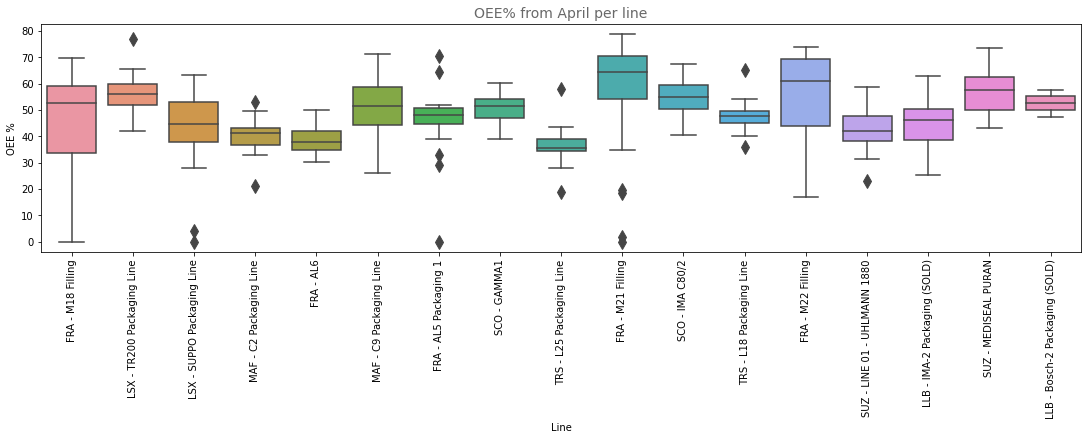

In [208]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 6))

sns.boxplot(x='Line', y='OEE %', data=df, whis=1.5, fliersize=10).set_title('OEE% from April per line', color='dimgrey', size=14)
plt.xticks(rotation=90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

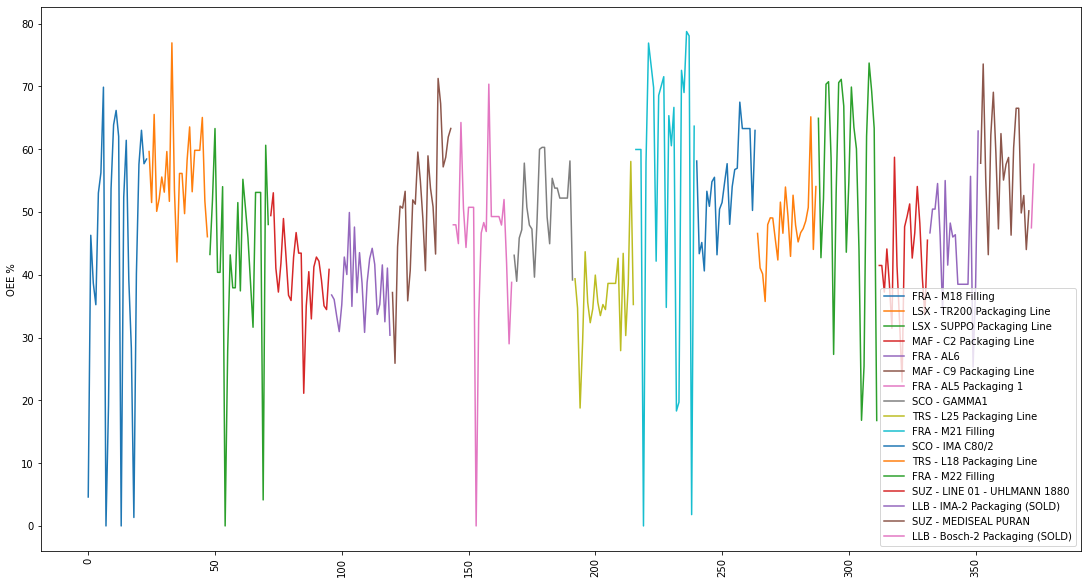

In [209]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 8))



for line in df.Line.unique():
    sns.lineplot(data=df['OEE %'].loc[df['Line'] == line], ci=None, label=line)
#     sns.lineplot(x='Line', y='OEE %', data=df['OEE %'].loc[df['Line'] == line]).set_title('OEE% from April 1 per line', color='dimgrey', size=14)
#     mask = (df['Line'] == line)
#     line_data = df['OEE %'].loc[mask]
# #     sns.kdeplot(data=kde_data, ax=axs[0], shade=True, label=line, bw_method=0.5)
#     sns.lineplot(x='Line', y='OEE %', data=df, label=line).set_title('OEE% from April 1 per line', color='dimgrey', size=14)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'FRA - M18 Filling'),
  Text(1, 0, 'LSX - TR200 Packaging Line'),
  Text(2, 0, 'LSX - SUPPO Packaging Line'),
  Text(3, 0, 'MAF - C2 Packaging Line'),
  Text(4, 0, 'FRA - AL6'),
  Text(5, 0, 'MAF - C9 Packaging Line'),
  Text(6, 0, 'FRA - AL5 Packaging 1'),
  Text(7, 0, 'SCO - GAMMA1'),
  Text(8, 0, 'TRS - L25 Packaging Line'),
  Text(9, 0, 'FRA - M21 Filling'),
  Text(10, 0, 'SCO - IMA C80/2'),
  Text(11, 0, 'TRS - L18 Packaging Line'),
  Text(12, 0, 'FRA - M22 Filling'),
  Text(13, 0, 'SUZ - LINE 01 - UHLMANN 1880'),
  Text(14, 0, 'LLB - IMA-2 Packaging (SOLD)'),
  Text(15, 0, 'SUZ - MEDISEAL PURAN'),
  Text(16, 0, 'LLB - Bosch-2 Packaging (SOLD)')])

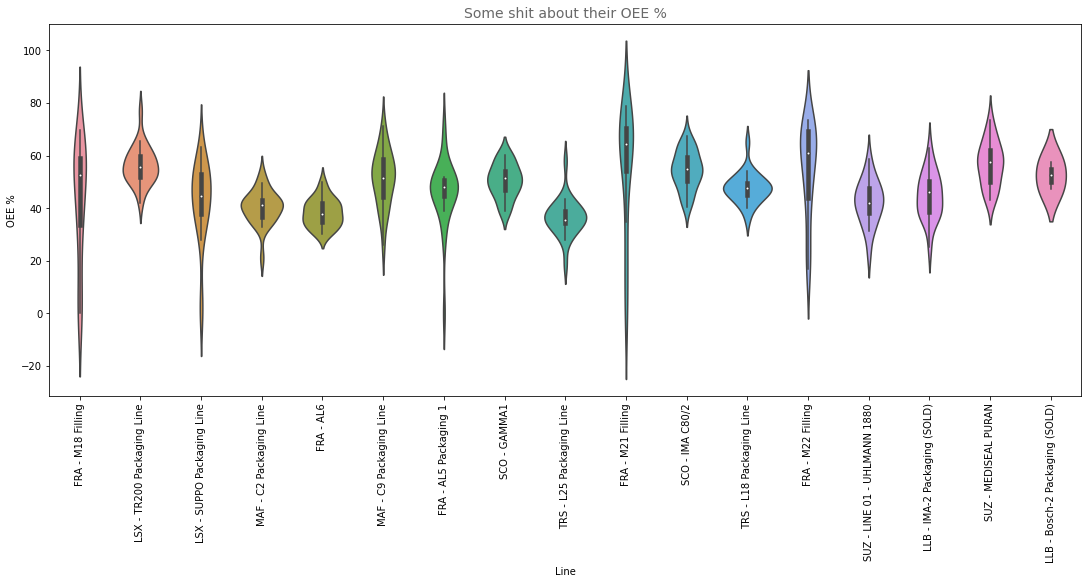

In [210]:
# ax = sns.violinplot(x="Line", y="OEE %", data=df)
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 8))

sns.violinplot(x='Line', y='OEE %', data=df, whis=1.5, fliersize=10).set_title('Some shit about their OEE %', color='dimgrey', size=14)
plt.xticks(rotation=90)

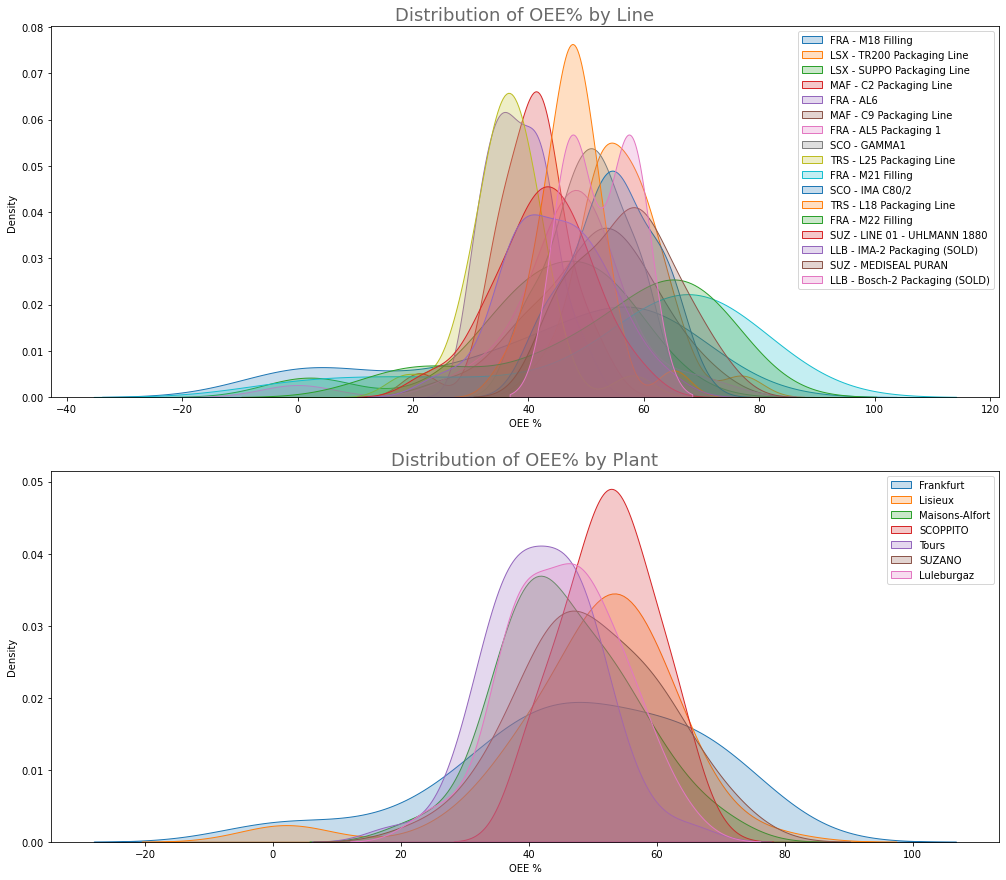

In [211]:
# colors = ['darkslateblue', 'mediumseagreen', 'gray', 'salmon', 'cornflowerblue', 'cadetblue', 'gold']

fig, axs = plt.subplots(2, 1, figsize=(17, 15))
for line in df.Line.unique():
#     idx = rest_types.index(user)
#     kde_data = day_data.loc[day_data['value'] == user]
    mask = (df['Line'] == line)
    kde_data = df['OEE %'].loc[mask]
    sns.kdeplot(data=kde_data, ax=axs[0], shade=True, label=line, bw_method=0.5)
    
for plant in df.Plant.unique():
#     idx = rest_types.index(user)
#     kde_data = day_data.loc[day_data['value'] == user]
    mask = (df['Plant'] == plant)
    kde_data = df['OEE %'].loc[mask]
    sns.kdeplot(data=kde_data, ax=axs[1], shade=True, label=plant, bw_method=0.5, cmap = 'winter')
    
# Customizing charts
axs[0].set_title('Distribution of OEE% by Line', color='dimgrey', size=18)
axs[1].set_title('Distribution of OEE% by Plant', color='dimgrey', size=18)
axs[0].legend()
axs[1].legend()

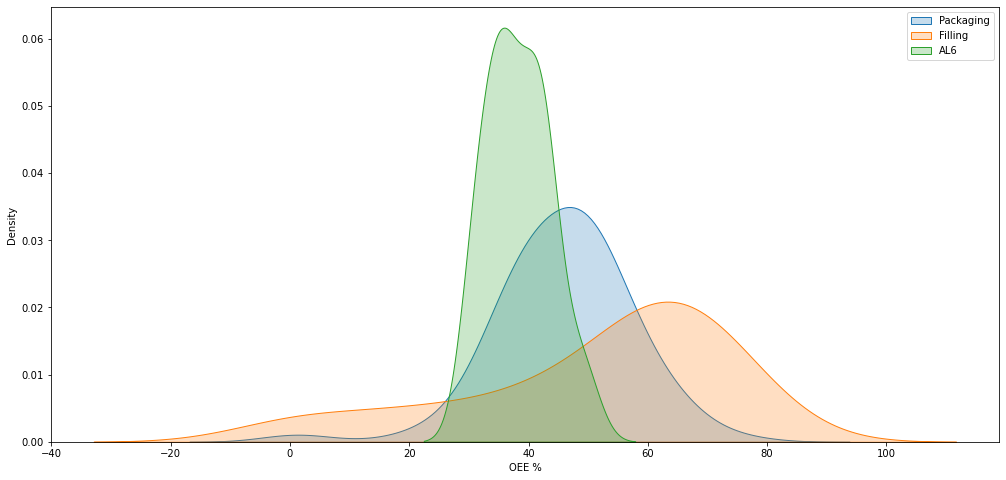

In [212]:
fig, axs = plt.subplots(1, 1, figsize=(17, 8))
for type in ['Packaging','Filling','AL6']:
#     idx = rest_types.index(user)
#     kde_data = day_data.loc[day_data['value'] == user]
    mask = (df['Line'].str.contains(type))
    kde_data = df['OEE %'].loc[mask]
    sns.kdeplot(data=kde_data, ax=axs, shade=True, label=type, bw_method=0.5)
axs.legend()

In [214]:
round(df.groupby(['Plant','Line'])['OEE %'].describe(),2)

count   mean    std    min  \
Plant          Line                                                         
Frankfurt      FRA - AL5 Packaging 1            24.0  46.02  12.78   0.00   
               FRA - AL6                        24.0  38.33   5.30  30.38   
               FRA - M18 Filling                24.0  42.86  22.60   0.00   
               FRA - M21 Filling                24.0  55.82  23.55   0.00   
               FRA - M22 Filling                24.0  54.66  17.70  16.80   
Lisieux        LSX - SUPPO Packaging Line       24.0  42.65  15.28   0.00   
               LSX - TR200 Packaging Line       24.0  56.30   7.23  42.04   
Luleburgaz     LLB - Bosch-2 Packaging (SOLD)    2.0  52.56   7.17  47.49   
               LLB - IMA-2 Packaging (SOLD)     20.0  44.71   8.84  25.32   
Maisons-Alfort MAF - C2 Packaging Line          24.0  40.38   6.47  21.13   
               MAF - C9 Packaging Line          24.0  51.37  10.59  25.91   
SCOPPITO       SCO - GAMMA1                     24.0  50.45   6.50  38.97   
               SCO - IMA C80/2                  24.0  54.55   7.28  40.62   
SUZANO         SUZ - LINE 01 - UHLMANN 1880     20.0  42.43   8.42  22.94   
               SUZ - MEDISEAL PURAN             20.0  56.90   8.49  43.21   
Tours          TRS - L18 Packaging Line         24.0  47.70   5.76  35.76   
               TRS - L25 Packaging Line         24.0  36.59   7.11  18.78   

                                                 25%    50%    75%    max  
Plant          Line                                                        
Frankfurt      FRA - AL5 Packaging 1           44.82  48.15  50.62  70.37  
               FRA - AL6                       34.65  37.91  41.90  49.93  
               FRA - M18 Filling               33.52  52.69  59.19  69.89  
               FRA - M21 Filling               53.97  64.52  70.44  78.76  
               FRA - M22 Filling               43.94  61.07  69.43  73.74  
Lisieux        LSX - SUPPO Packaging Line      37.93  44.58  53.13  63.30  
               LSX - TR200 Packaging Line      51.76  55.87  59.83  76.95  
Luleburgaz     LLB - Bosch-2 Packaging (SOLD)  50.02  52.56  55.09  57.62  
               LLB - IMA-2 Packaging (SOLD)    38.50  46.16  50.47  62.91  
Maisons-Alfort MAF - C2 Packaging Line         36.54  41.17  43.07  53.07  
               MAF - C9 Packaging Line         44.17  51.60  58.78  71.28  
SCOPPITO       SCO - GAMMA1                    46.85  51.50  54.21  60.31  
               SCO - IMA C80/2                 50.41  54.77  59.35  67.51  
SUZANO         SUZ - LINE 01 - UHLMANN 1880    38.20  42.08  47.80  58.73  
               SUZ - MEDISEAL PURAN            50.11  57.69  62.32  73.58  
Tours          TRS - L18 Packaging Line        44.94  47.64  49.66  65.17  
               TRS - L25 Packaging Line        34.23  35.60  38.82  58.06

In [215]:
df_race = df.groupby(['Line','Review_Date'])['lap_time'].sum().groupby('Line').cumsum().reset_index()
df_race.set_index('Review_Date', inplace=True)

In [216]:
df_race_group = df_race.groupby(['Line', 'Review_Date'])['lap_time'].sum().reset_index()
df_race_group['lap_time'] = df_race_group['lap_time'] + 88
df_race_group['total_lap'] = df_race_group.groupby('Line').cumsum()
df_race_group.set_index('Review_Date', inplace=True)

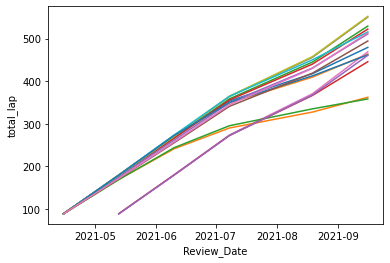

In [217]:
for line in df_race_group.Line.unique():
    sns.lineplot(data=df_race_group['total_lap'].loc[df_race_group['Line'] == line], ci=None)

In [229]:
df_race_group['mean_race_time'] = df_race_group.groupby([df_race_group.index])['total_lap'].mean()
df_race_group['std_race_time'] = df_race_group.groupby([df_race_group.index])['total_lap'].std()
df_race_group['standardised_race_time'] = (df_race_group['total_lap'] - df_race_group['mean_race_time'])


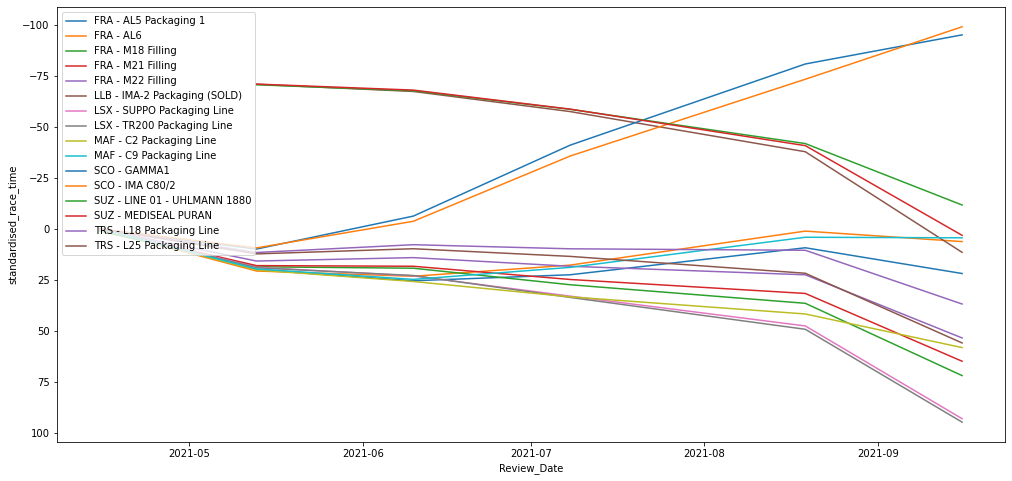

In [230]:
fig, axs = plt.subplots(1, 1, figsize=(17,8))
for line in df_race_group.Line.unique():
    sns.lineplot(data=df_race_group['standardised_race_time'].loc[(df_race_group['Line'] == line) & (df_race_group['Line'] != 'LLB - Bosch-2 Packaging (SOLD)')], ci=None, label=line, ax=axs)

axs.invert_yaxis()
axs.legend(loc='upper left')


In [226]:
import numpy as np

array = np.array(df_race_group['total_lap'])

# n = array.size

# N = 2
# M = n//N

# reshaped1 = array.reshape((N, M))

reshaped1 = array.reshape(-1, 1)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_race_group['scaled'] = scaler.fit_transform(reshaped1)


In [223]:
df_race_group.head()

,Line,lap_time,total_lap,mean_race_time,std_race_time,standardised_race_time,scaled
Review_Date,,,,,,,
2021-04-15,FRA - AL5 Packaging 1,89.105096,89.105096,88.999159,0.334550,0.316655,0.433173
2021-05-13,FRA - AL5 Packaging 1,90.830850,179.935946,160.020507,35.360211,0.563216,0.550549
2021-06-10,FRA - AL5 Packaging 1,93.325854,273.261800,247.910479,34.985741,0.724619,0.720244
2021-07-08,FRA - AL5 Packaging 1,80.533578,353.795378,331.388069,36.154271,0.619769,-0.149810
2021-08-19,FRA - AL5 Packaging 1,63.912298,417.707676,408.532709,42.175671,0.217542,-1.280291


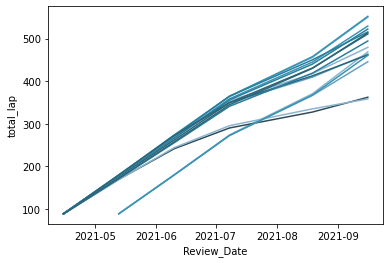

In [257]:
sns.color_palette("viridis", as_cmap=True)
for line in df_race_group.Line.unique():
    sns.lineplot(data=df_race_group['total_lap'].loc[df_race_group['Line'] == line], ci=None)
sns.color_palette('coolwarm', as_cmap=True)

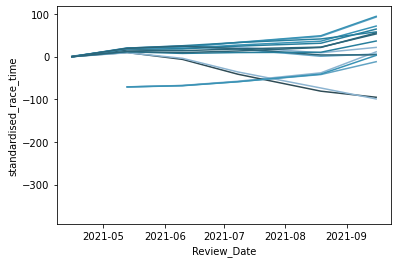

In [259]:
for line in df_race_group.Line.unique():
    sns.lineplot(data=df_race_group['standardised_race_time'].loc[df_race_group['Line'] == line], ci=None)
# sns.color_palette("Spectral", as_cmap=True)

<AxesSubplot:xlabel='Review_Date', ylabel='total_lap'>

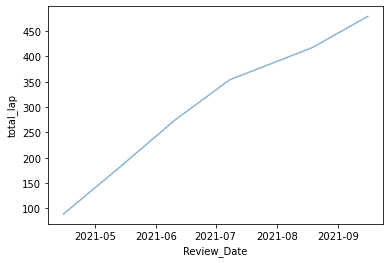

In [238]:
sns.lineplot(data=df_race_group['total_lap'].loc[df_race_group['Line'] == line], ci=None)